In [1]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
import warnings

In [3]:
from joblib import dump

In [4]:
warnings.filterwarnings("ignore")

# Processamento e transformação dos dados 

In [6]:
df = pd.read_csv("./dataset/dataset.csv")

In [7]:
print("Shape:", df.shape)
print(df.head())

Shape: (478, 2)
   battery_capacity_kWh  range_km
0                  37.8       225
1                  37.8       225
2                  50.8       280
3                  50.8       280
4                  60.0       315


## Plotagem gráfico para analise

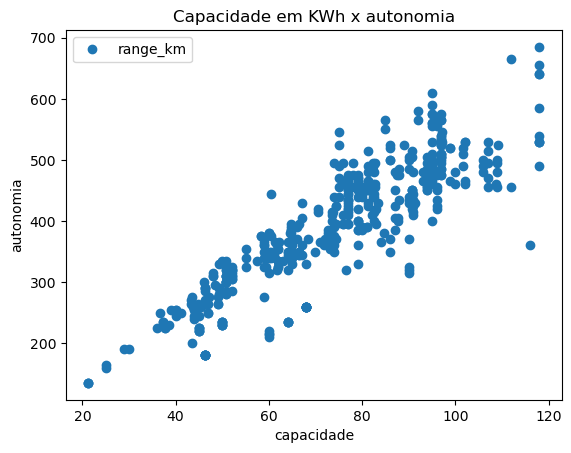

In [9]:
df.plot(x = 'battery_capacity_kWh', y = 'range_km', style = 'o')
plt.title("Capacidade em KWh x autonomia")
plt.xlabel("capacidade")
plt.ylabel("autonomia")
plt.savefig('./img/grafico1.png')

# Reshape dos dados e dividindo entre treino e teste

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [12]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_treino = X_treino.reshape(-1, 1).astype(np.float32)

# Criando o modelo

In [15]:
modelo = LinearRegression()

# Treinamento do modelo

In [17]:
modelo.fit(X_treino, y_treino)
print("\n")
print("TREINAMENTO DO MODELO REALIZADO COM SUCESSO")



TREINAMENTO DO MODELO REALIZADO COM SUCESSO


# Coeficiente b0 e b1

In [19]:
print("\n")
print(f"B1 :{modelo.coef_}")

print(f"B0 :{modelo.intercept_}")



B1 :[4.375177]
B0 :68.18869018554688


## Plotagem linha de regressão - $y = b_1 \cdot X + b_0$

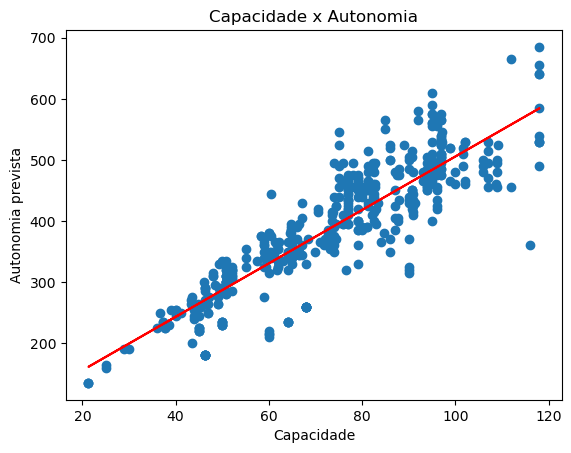

In [21]:
regression_line = modelo.coef_ * X  + modelo.intercept_
plt.scatter(X,y)
plt.title("Capacidade x Autonomia")
plt.xlabel("Capacidade")
plt.ylabel("Autonomia prevista")
plt.plot(X, regression_line, color='red')
plt.savefig('./img/lineregressiongraphic.png')
plt.show()

# Observando previsões com DADOS DE TESTE

In [23]:
y_pred = modelo.predict(X_teste)

In [24]:
df_valores = pd.DataFrame({'valor real': y_teste, 'valor previsto': y_pred})
print("\n")
print(df_valores)



     valor real  valor previsto
0           590      483.392979
1           410      466.329789
2           495      545.082973
3           440      391.951781
4           330      365.700720
..          ...             ...
139         325      326.324128
140         485      492.143332
141         610      483.392979
142         455      413.827666
143         420      405.077312

[144 rows x 2 columns]


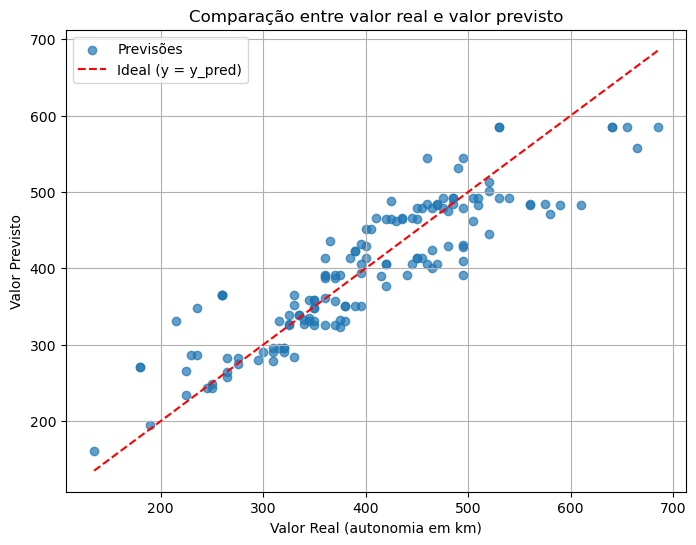

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df_valores['valor real'], df_valores['valor previsto'], alpha=0.7, label='Previsões')
plt.plot([df_valores['valor real'].min(), df_valores['valor real'].max()],
         [df_valores['valor real'].min(), df_valores['valor real'].max()],
         color='red', linestyle='--', label='Ideal (y = y_pred)')

plt.xlabel('Valor Real (autonomia em km)')
plt.ylabel('Valor Previsto')
plt.title('Comparação entre valor real e valor previsto')
plt.legend()
plt.grid(True)
plt.savefig("./img/realvspred.png")
plt.show()

# Analisando as métricas

In [27]:
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = math.sqrt(mean_squared_error(y_teste, y_pred))
r2 = r2_score(y_teste, y_pred)

In [28]:
print("\n")
print(f"ERRO ABSOLUTO MEDIO : {mae}")
print(f"ERRO QUADRATICO MEDIO : {mse}")
print(f"Raiz do erro quadratico : {rmse}")
print(f"R2 SCORE : {r2}")



ERRO ABSOLUTO MEDIO : 36.80364127457141
ERRO QUADRATICO MEDIO : 2263.173145889613
Raiz do erro quadratico : 47.57281940236056
R2 SCORE : 0.8003456326550422


## Interpretação das metricas 
O modelo esta errando uma média 36 km, para o erro quadrático há alguns erros maiores (outliers), que puxam a média quadrada pra cima e fica auto devido a ser ao quadrado. Enquanto a raiz que é mais sensível a outliers está mostrando ainda menos de 50, 

R² está nos mostrando uma forte correlação linear (80%)
 

# Salvando o modelo 

In [31]:
dump(modelo, "model_range.joblib")

['model_range.joblib']